In [7]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def wrapped_gaussian(theta, mu, sigma):
    # Number of wrapping terms to include
    k = np.arange(-3, 4)
    
    # Calculate wrapped gaussian
    f = np.zeros_like(theta)
    for ki in k:
        f += np.exp(-(theta - mu + 2*np.pi*ki)**2 / (2*sigma**2))
    
    # Normalize
    f = f / (sigma * np.sqrt(2*np.pi))
    
    return f


In [27]:
R = 0.6
sigma = np.sqrt(-2*np.log(R)) 
a = np.exp(-sigma**2/2)
phi = np.linspace(-np.pi, np.pi, 100)
a0 = np.ones_like(phi) / (2*np.pi)
for n in range(1, 100):
    a0 += 2*a**(n**2) * np.cos(n*phi) / (2*np.pi)



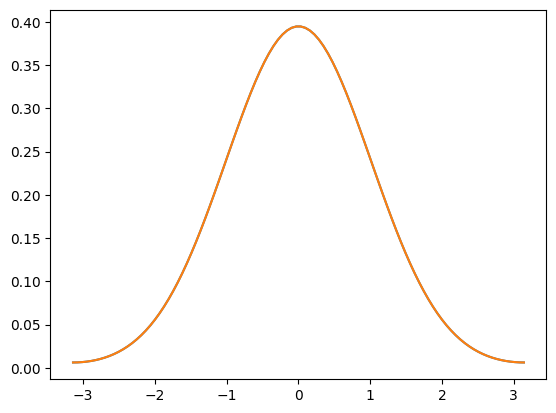

In [28]:
plt.plot(phi,wrapped_gaussian(phi,0,sigma))
plt.plot(phi,a0)

In [1]:
import sympy as sp

In [3]:
a_1 = sp.symbols('a_1',complex = True,function=True)
t,n,omega,K = sp.symbols('t,n,omega,K',real=True)
H = sp.symbols('H',complex=True)
a_1 = sp.Function('a_1')(t)

In [4]:
sp.conju(H)

AttributeError: module 'sympy' has no attribute 'conju'

In [14]:
sp.simplify((a_1**n**2).diff(t))

n**2*a_1(t)**(n**2 - 1)*Derivative(a_1(t), t)

In [15]:
A = sp.simplify((a_1**n**2).diff(t)) + n*sp.I*a_1**n**2*omega + sp.Rational(1,2)* n * K *(H * a_1**((n+2)**2) - H.conjugate() * a_1**((n-2)**2))

In [19]:
B = sp.cancel(A/(a_1**(n**2-1)))

In [20]:
B

H*K*n*a_1(t)**(1 - n**2)*a_1(t)**(n**2 + 4*n + 4)/2 - K*n*a_1(t)**(1 - n**2)*a_1(t)**(n**2 - 4*n + 4)*conjugate(H)/2 + n**2*a_1(t)**(1 - n**2)*a_1(t)**(n**2 - 1)*Derivative(a_1(t), t) + I*n*omega*a_1(t)**(n**2)*a_1(t)**(1 - n**2)

In [ ]:
from parfor import parfor
from tqdm.notebook import tqdm
from Simul import get_RQ_MOA4,get_RQ_MOA5,get_RQ_MOA2,get_R_simul_wfT,get_RQ_MOA6,get_Q2,get_Q3

In [ ]:
t_end = 20000
# Community 2의 초기 Daido parameter 설정
Q_init = 0.6

In [ ]:
alpha = 1.2
beta = 0.6
eta1 = 0.01
eta2 = 0.1

In [ ]:
alphas = np.linspace(0,np.pi/2,50)
betas = np.linspace(0,1,50)


Q2s_OA2 = []
for beta in tqdm(betas):
    @parfor(alphas,args=(beta,eta1,eta2),bar=False)
    def get_QR_long(alpha,beta,eta1,eta2):
        Q2 = get_Q3(1,Q_init,alpha=alpha,beta=beta,eta1=eta2,eta2=eta1,shift=0,t_end=t_end,dt=0.1)
        return Q2
    
    # RZ1,QZ1,RZ2,QZ2,a1s,b1s,a2s,b2s = zip(*get_QR_long)
    Q2 = get_QR_long
    Q2s_OA2.append(Q2)
Q2s_OA2 = np.array(Q2s_OA2)
# np.savez(f'OA2,eta={eta1/eta2}',Q2s=Q2s_OA2,eta1=eta1,eta2=eta2)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
t = np.arange(0,t_end,0.1)
t_temp = t[::1000]

In [ ]:
phi = np.linspace(0, 2*np.pi, 10_000)

# α는 원하는 해상도로 – 여기선 0 ~ π/2 (끝점 제외) 500 점
alphas_ = np.linspace(0, np.pi/2, 501)[:-1]
alphas = np.linspace(0,np.pi/2,50)

C:\Users\kim9y\AppData\Local\Temp\ipykernel_45328\1290055947.py:5: RuntimeWarning: invalid value encountered in divide
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2
C:\Users\kim9y\AppData\Local\Temp\ipykernel_45328\1290055947.py:5: RuntimeWarning: invalid value encountered in sqrt
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2


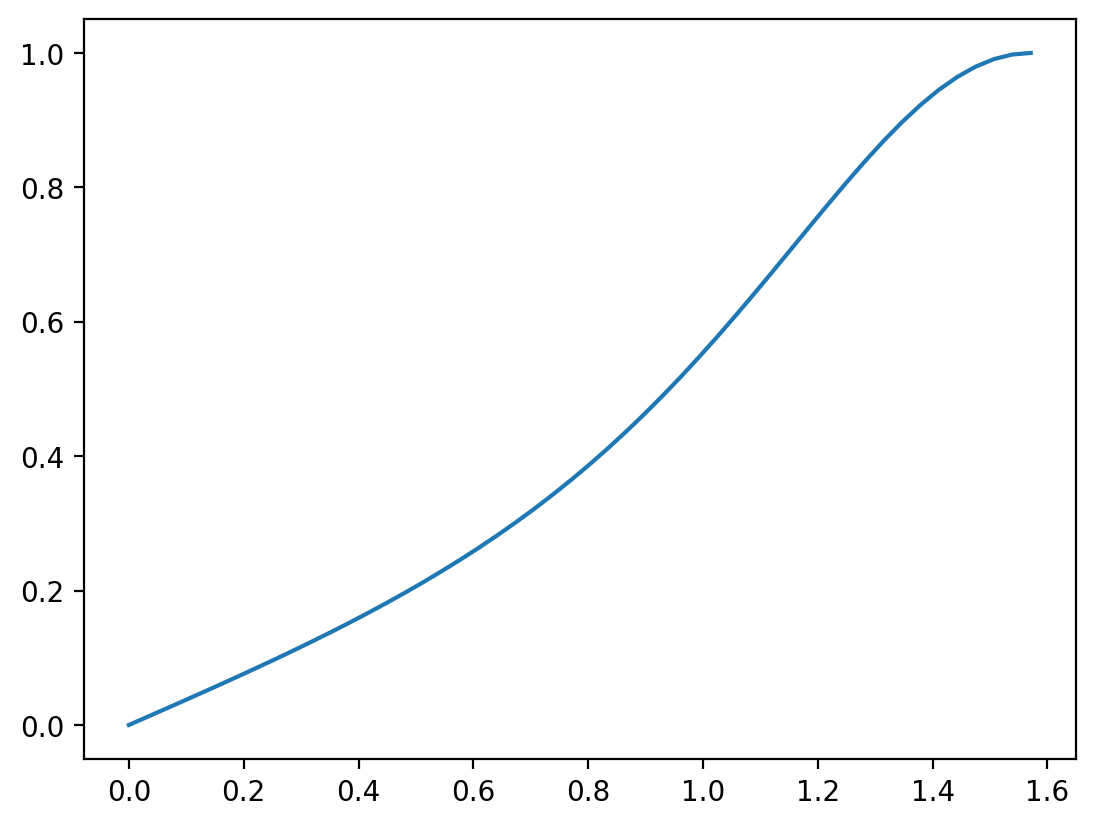

In [ ]:
eta = eta2/eta1
mu_min = get_mu_min(alphas,eta=eta)
plt.plot(alphas,mu_min)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

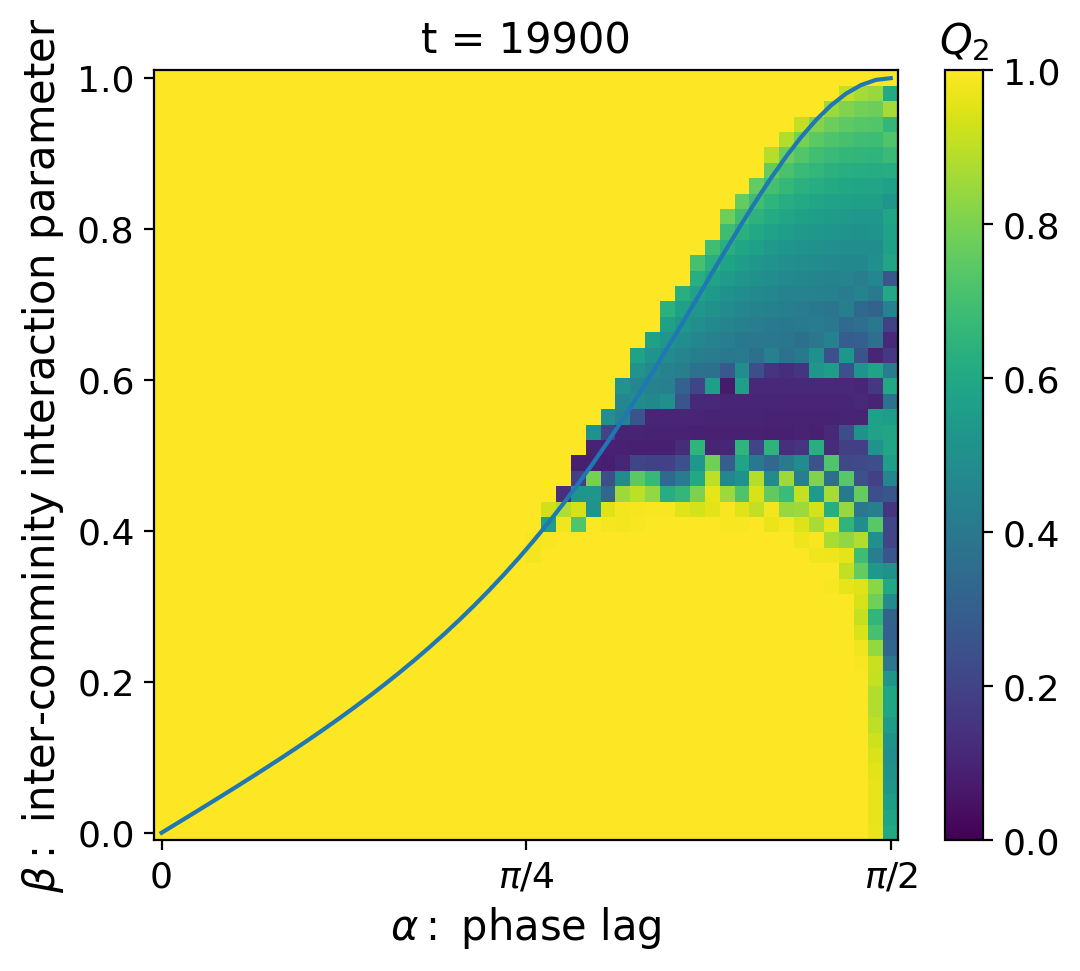

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(6,5),dpi=100)

index = -1
im1 = ax1.pcolormesh(alphas,betas,Q2s_OA2[:,:,index],vmin=0.0, vmax=1)
ax1.set_aspect('auto')
text = ax1.set_title(rf't = {t_temp[index] :.0f}',fontsize=15)
ax1.plot(alphas,mu_min)
cbar1 = fig.colorbar(im1,ax=ax1,shrink=1)
cbar1.ax.set_title(r'$Q_2$',fontsize=15)
cbar1.ax.tick_params(labelsize=13)
plt.sca(ax1)
plt.xlabel(r'$\alpha:$ phase lag',fontsize = 15)
plt.ylabel(r'$\beta:$ inter-comminity interaction parameter',fontsize = 15)
plt.xticks([0,np.pi/4,np.pi/2],[0,'$\pi/4$','$\pi/2$'],fontsize=13)
plt.yticks(fontsize=13)

In [ ]:
from IPython.display import HTML

In [ ]:
def get_ani(idx):
    im1.set_array(Q2s_OA2[:,:,idx])
    text.set_text(rf't = ${t_temp[idx] :.0f}$')

len(t)
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
%config InlineBackend.figure_format = 'retina'
idxs=  np.arange(000,len(t_temp),1)
ani = FuncAnimation(fig,get_ani,frames=idxs,interval=50)
len(t)
# HTML(ani.to_jshtml())
ani.save(rf'HIGH ORDER CHIMERA/OA2 Q2,eta1 = {eta2},eta2 = {eta1}.mp4',dpi=300)